<a href="https://colab.research.google.com/github/AdiArtifice/AdiArtifice/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# STEP 2: Imports
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
genre_folder = '/content/drive/MyDrive/My Projects//Music Genre Classification/Data/genres_original'

In [4]:
# List genres
genres = os.listdir(genre_folder)
print(genres)

['jazz', 'metal', 'rock', 'reggae', 'hiphop', 'disco', 'classical', 'pop', 'country', 'blues']


In [ ]:
# STEP 4: Load & visualize spectrograms for 10–15 samples (1 per genre)
samples_to_plot = []

# Pick the first file from each genre folder
for genre in genres:
    genre_path = os.path.join(genre_folder, genre)
    files = sorted(os.listdir(genre_path))
    if files:
        samples_to_plot.append(os.path.join(genre_path, files[0]))

print(f'Found {len(samples_to_plot)} samples.')

Found 10 samples.


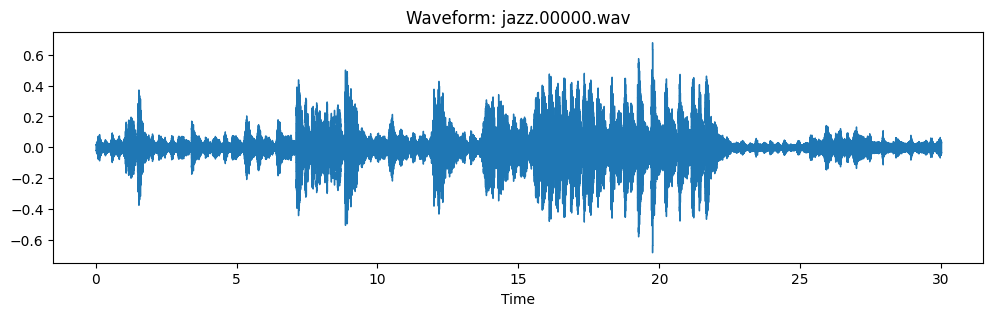

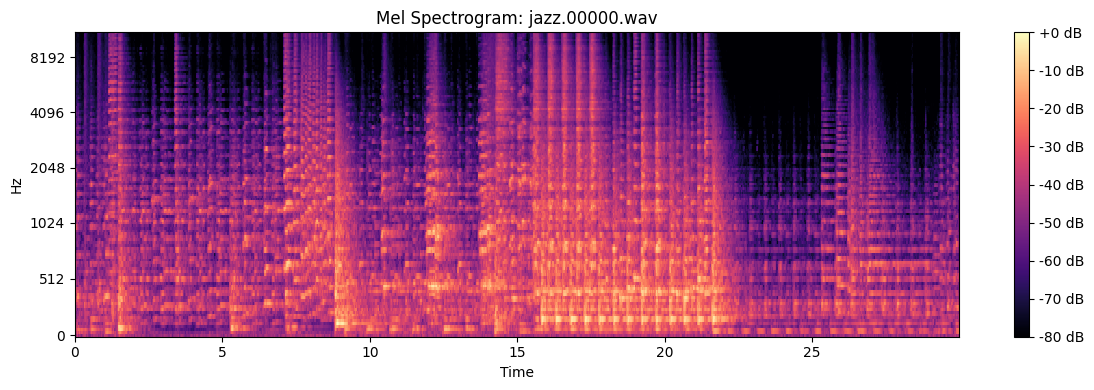

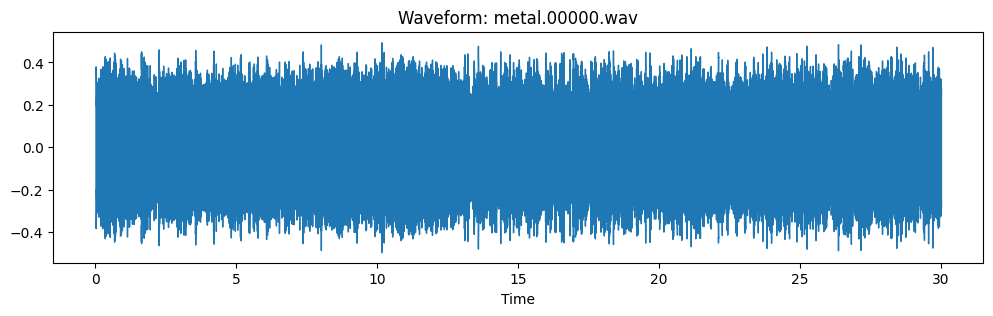

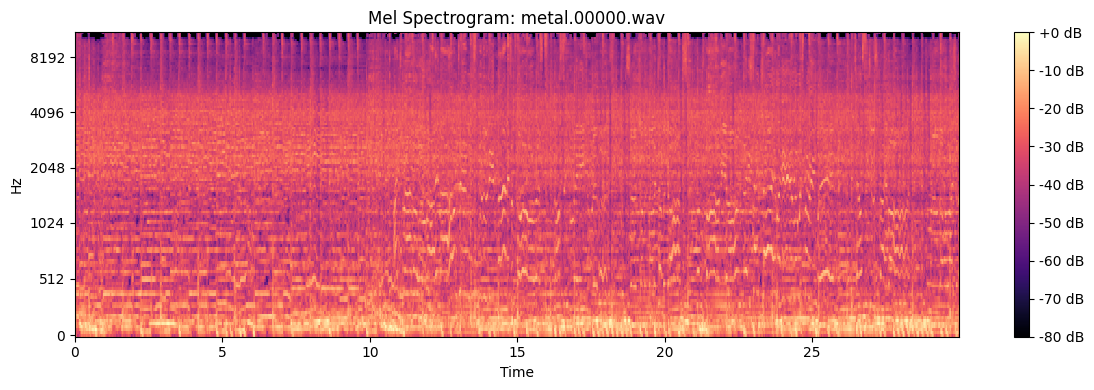

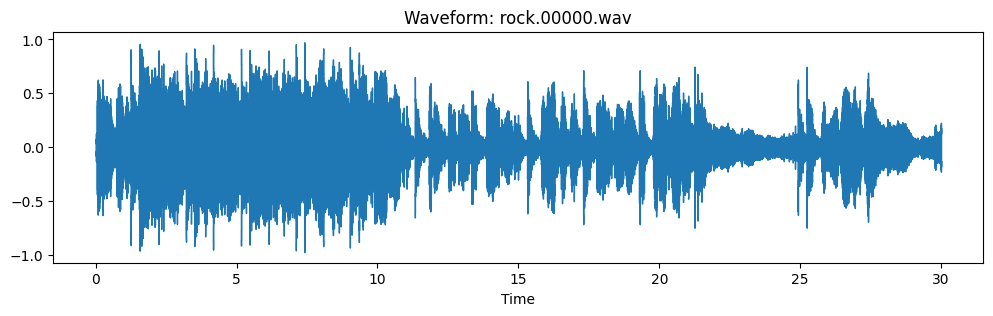

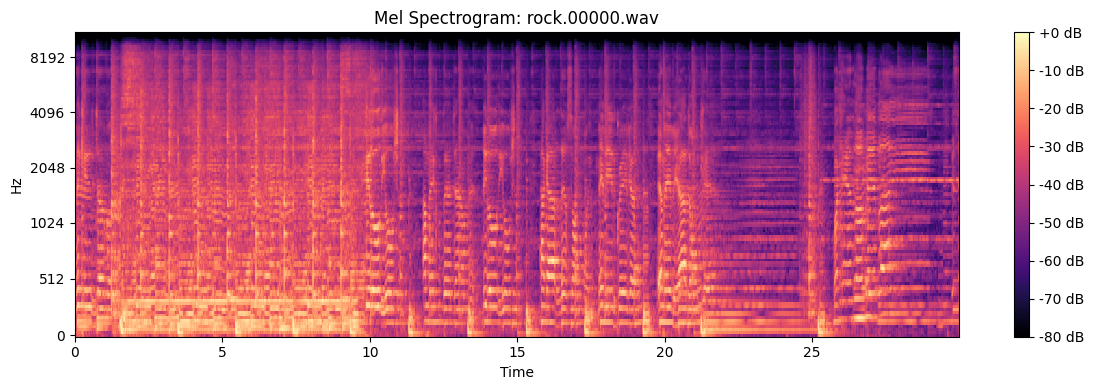

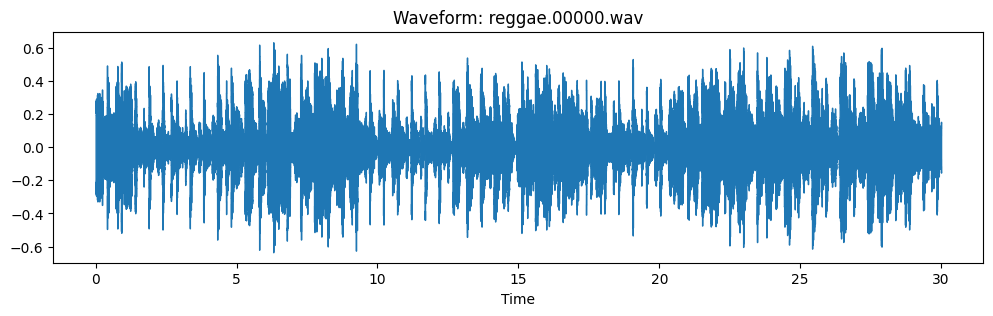

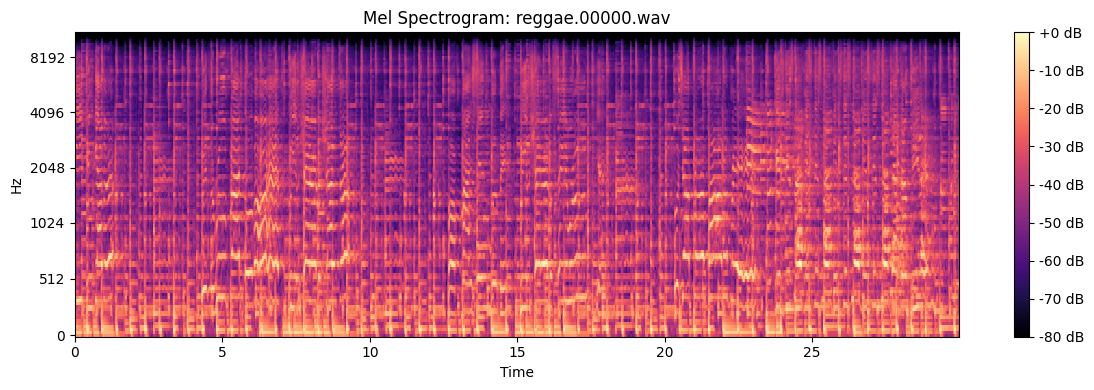

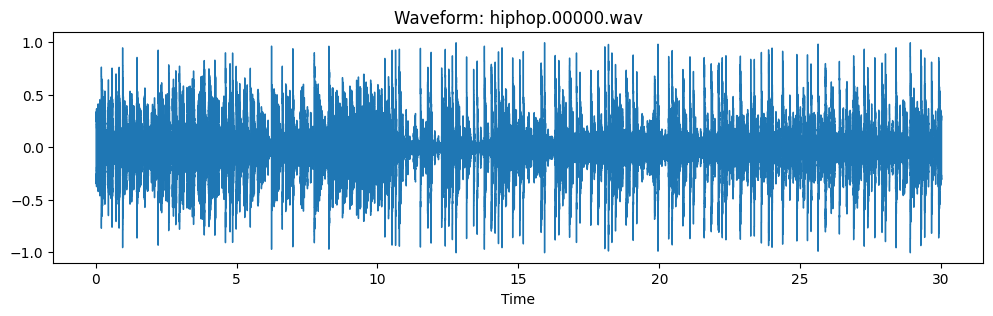

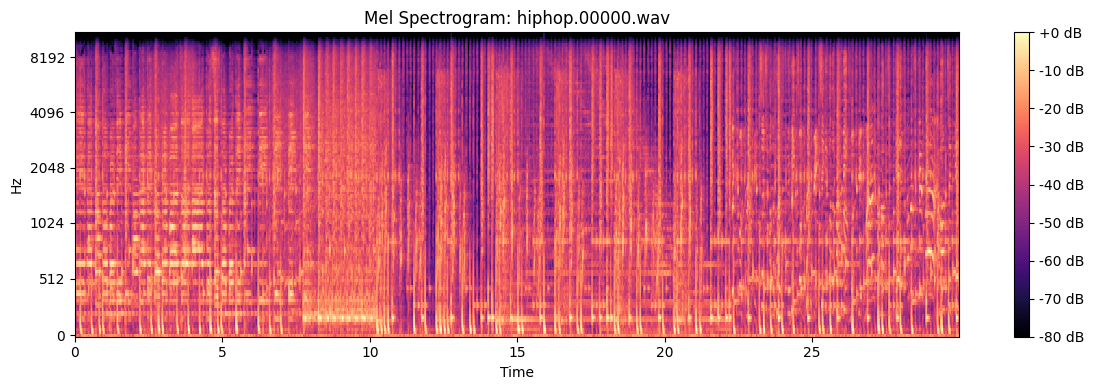

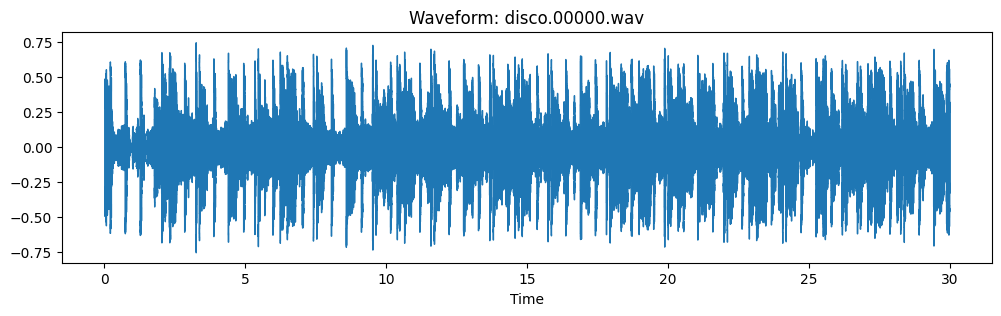

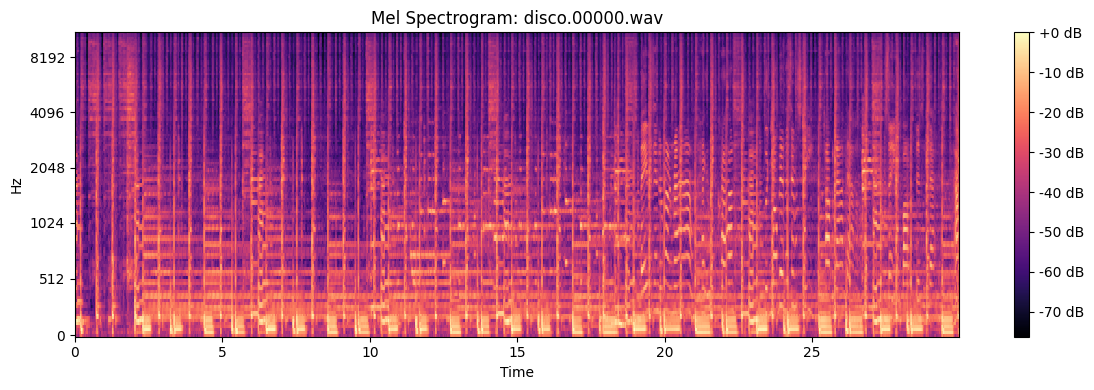

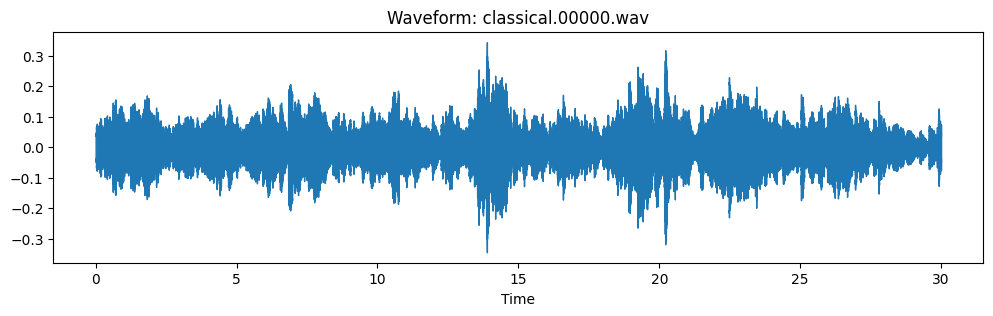

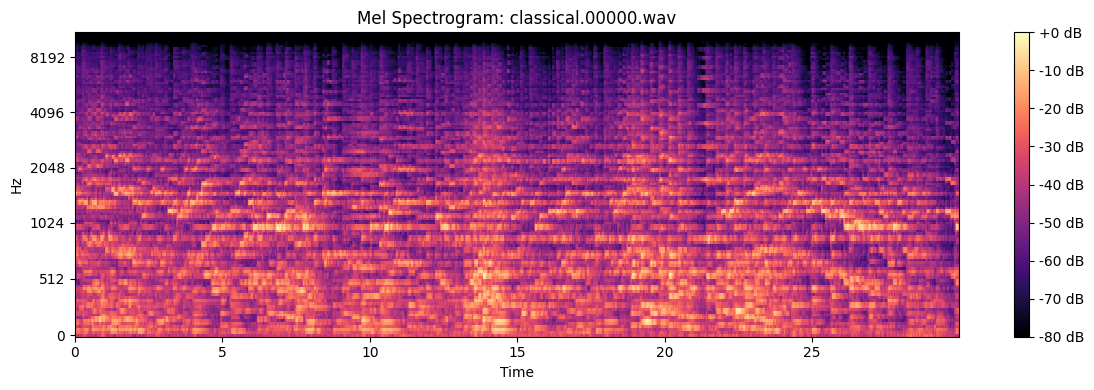

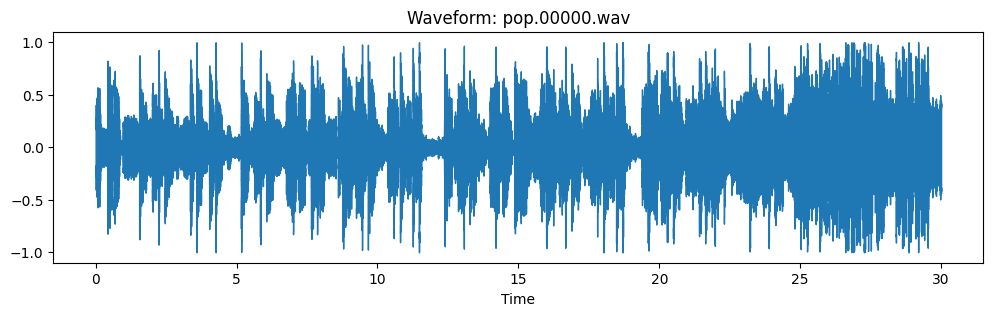

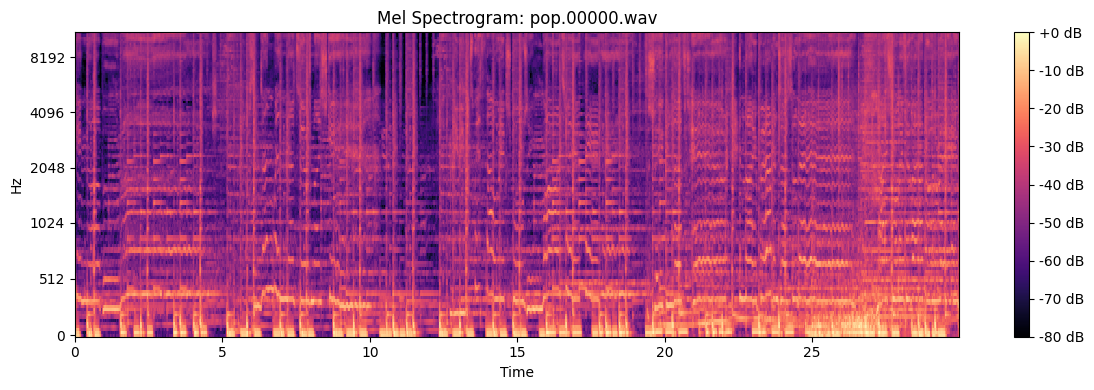

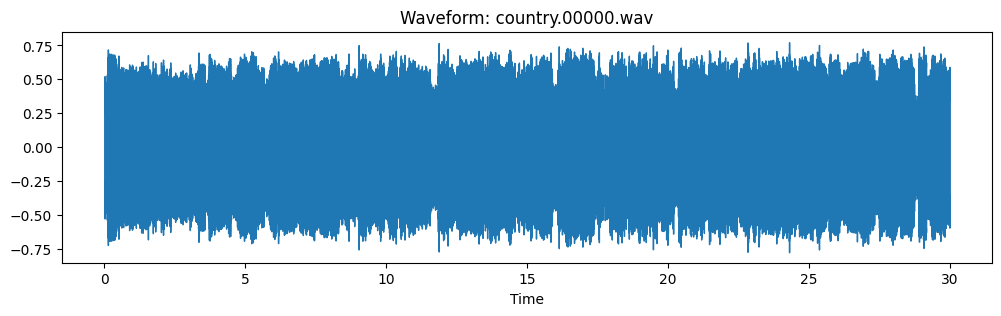

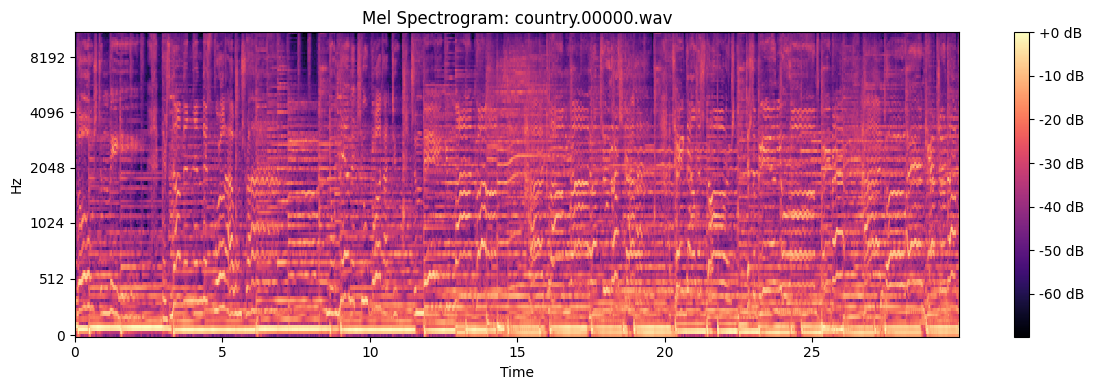

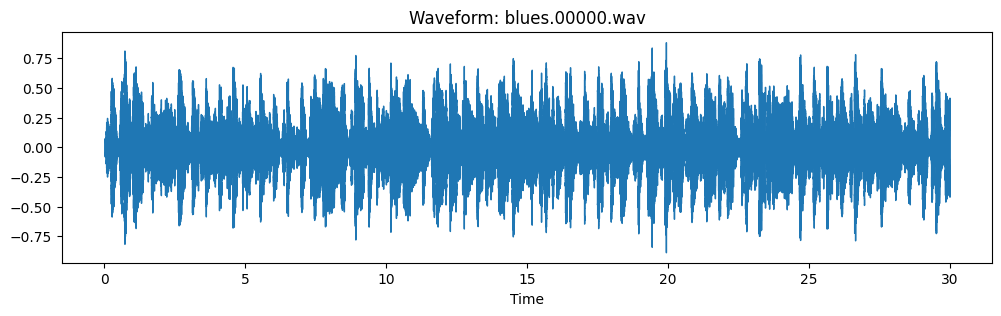

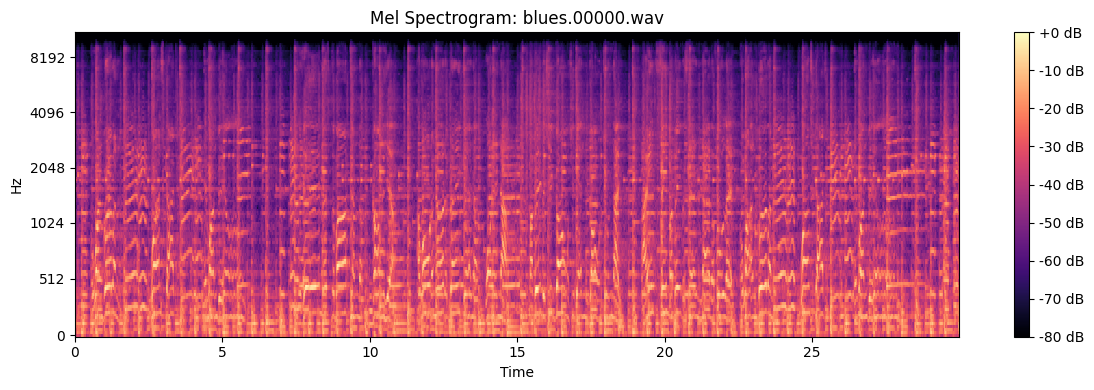

In [ ]:
# STEP 5: Plot waveforms and spectrograms
for path in samples_to_plot:
    y, sr = librosa.load(path, duration=30)

    # Plot waveform
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {os.path.basename(path)}')
    plt.show()

    # Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram: {os.path.basename(path)}')
    plt.tight_layout()
    plt.show()

In [ ]:
#Lets check if we have 100 ,png images in each genre folder
import os

# ✅ Your actual path
images_folder = '/content/drive/MyDrive/My Projects//Music Genre Classification/Data/images_original'

genre_counts = {}

# List all genre folders inside images_original
for genre in os.listdir(images_folder):
    genre_path = os.path.join(images_folder, genre)

    if os.path.isdir(genre_path):
        png_files = [f for f in os.listdir(genre_path) if f.endswith('.png')]
        genre_counts[genre] = len(png_files)

# Display image count per genre
for genre, count in genre_counts.items():
    print(f'{genre}: {count} images')

# Total image count
print(f'\nTotal spectrogram images: {sum(genre_counts.values())}')

pop: 100 images
metal: 110 images
disco: 100 images
hiphop: 100 images
country: 100 images
classical: 100 images
reggae: 100 images
jazz: 99 images
rock: 100 images
blues: 100 images

Total spectrogram images: 1009


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Set paths
source_audio_folder = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/genres_original'
target_image_folder = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_original'

# Create destination structure
os.makedirs(target_image_folder, exist_ok=True)

for genre in sorted(os.listdir(source_audio_folder)):
    genre_path = os.path.join(source_audio_folder, genre)
    target_genre_path = os.path.join(target_image_folder, genre)
    os.makedirs(target_genre_path, exist_ok=True)

    files = sorted([f for f in os.listdir(genre_path) if f.endswith('.wav')])
    print(f'Processing genre: {genre} ({len(files)} files)')

    for file in files:
        try:
            file_path = os.path.join(genre_path, file)
            y, sr = librosa.load(file_path, duration=30)

            # Generate mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_DB = librosa.power_to_db(S, ref=np.max)

            # Plot and save as image
            fig = plt.figure(figsize=(1.28, 1.28), dpi=100)  # 128x128 pixels
            plt.axis('off')  # no axes
            librosa.display.specshow(S_DB, sr=sr, x_axis=None, y_axis=None)
            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

            output_file = os.path.join(target_genre_path, file.replace('.wav', '.png'))
            fig.savefig(output_file, dpi=100, bbox_inches='tight', pad_inches=0)
            plt.close(fig)

        except Exception as e:
            print(f'Error processing {file}: {e}')

print("\n✅ All spectrograms generated and saved in 'new_images_original'.")

Processing genre: blues (100 files)
Processing genre: classical (100 files)
Processing genre: country (100 files)
Processing genre: disco (100 files)
Processing genre: hiphop (100 files)
Processing genre: jazz (100 files)


<ipython-input-10-70a3f008b1c5>:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing jazz.00054.wav: 
Processing genre: metal (100 files)
Processing genre: pop (100 files)
Processing genre: reggae (100 files)
Processing genre: rock (100 files)

✅ All spectrograms generated and saved in 'new_images_original'.


In [ ]:
#Due to error processing jazz.00054.wav, rerunning the jazz folder again
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths
genre = 'jazz'
source_genre_path = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/genres_original/jazz'
target_genre_path = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_original/jazz'

# Ensure target folder exists
os.makedirs(target_genre_path, exist_ok=True)

# List .wav files (sorted)
files = sorted([f for f in os.listdir(source_genre_path) if f.endswith('.wav')])
print(f'Found {len(files)} jazz files. Processing...')

# Process each .wav in jazz
for file in files:
    try:
        file_path = os.path.join(source_genre_path, file)
        output_file = os.path.join(target_genre_path, file.replace('.wav', '.png'))

        # Skip if already exists
        if os.path.exists(output_file):
            continue

        # Load audio and generate mel spectrogram
        y, sr = librosa.load(file_path, duration=30)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        # Plot and save spectrogram
        fig = plt.figure(figsize=(1.28, 1.28), dpi=100)
        plt.axis('off')
        librosa.display.specshow(S_DB, sr=sr, x_axis=None, y_axis=None)
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        fig.savefig(output_file, dpi=100, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        print(f'Saved: {file}')

    except Exception as e:
        print(f'Error processing {file}: {e}')

print("\n✅ Jazz folder reprocessed.")

Found 100 jazz files. Processing...
Saved: jazz.00054.wav

✅ Jazz folder reprocessed.


In [ ]:
#Splitting

import os
import shutil
import random
from pathlib import Path

# Paths
original_path = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_original'
split_base_path = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_split'

# Create the split folders if not exist
splits = ['train', 'val', 'test']
genres = os.listdir(original_path)

for split in splits:
    for genre in genres:
        split_genre_path = os.path.join(split_base_path, split, genre)
        os.makedirs(split_genre_path, exist_ok=True)

# Split: 80% train, 10% val, 10% test
for genre in genres:
    genre_path = os.path.join(original_path, genre)
    all_images = os.listdir(genre_path)
    random.shuffle(all_images)

    total = len(all_images)
    train_count = int(0.8 * total)
    val_count = int(0.1 * total)
    test_count = total - train_count - val_count

    train_files = all_images[:train_count]
    val_files = all_images[train_count:train_count + val_count]
    test_files = all_images[train_count + val_count:]

    def copy_files(file_list, target_split):
        for fname in file_list:
            src = os.path.join(genre_path, fname)
            dst = os.path.join(split_base_path, target_split, genre, fname)
            shutil.copyfile(src, dst)

    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

print("✅ Done splitting dataset into train, val, and test.")


✅ Done splitting dataset into train, val, and test.


In [ ]:
#ImageDataGenerator Setup

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Base directory
base_dir = '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_split'

# Data generators (with normalization only)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # for evaluation
)


Found 800 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
#Build the Custom CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 genres
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,074 (3.17 MB)

 Trainable params: 832,074 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Lets compile and train the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1242 - loss: 2.2909 - val_accuracy: 0.2000 - val_loss: 2.0941
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2046 - loss: 2.0760 - val_accuracy: 0.3100 - val_loss: 1.9445
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3500 - loss: 1.7961 - val_accuracy: 0.3300 - val_loss: 1.8152
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3690 - loss: 1.7216 - val_accuracy: 0.3700 - val_loss: 1.7168
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4081 - loss: 1.6005 - val_accuracy: 0.3300 - val_loss: 1.9583
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4027 - loss: 1.6818 - val_accuracy: 0.4000 - val_loss: 1.6801
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5134 - loss: 1.3764 - val_accuracy: 0.4400 - val_loss: 1.5950
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5101 - loss: 1.3415 - val_accuracy: 0.3600 - val_loss:

In [ ]:
#Lets improve my model more
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout

# Model with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1207 - loss: 2.3056 - val_accuracy: 0.2000 - val_loss: 2.1269 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1805 - loss: 2.1451 - val_accuracy: 0.2700 - val_loss: 2.0301 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2662 - loss: 1.9778 - val_accuracy: 0.3400 - val_loss: 1.8620 - learning_rate: 0.0010
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3104 - loss: 1.8883 - val_accuracy: 0.3200 - val_loss: 1.9364 - learning_rate: 0.0010
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3135 - loss: 1.9081 - val_accuracy: 0.3200 - val_loss: 1.7381 - learning_rate: 0.0010
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3787 - loss: 1.7360 - val_accuracy: 0.3900 - val_loss: 1.7054 - learning_rate: 0.0010
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4404 - loss: 1.6426 - val_accuracy: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step


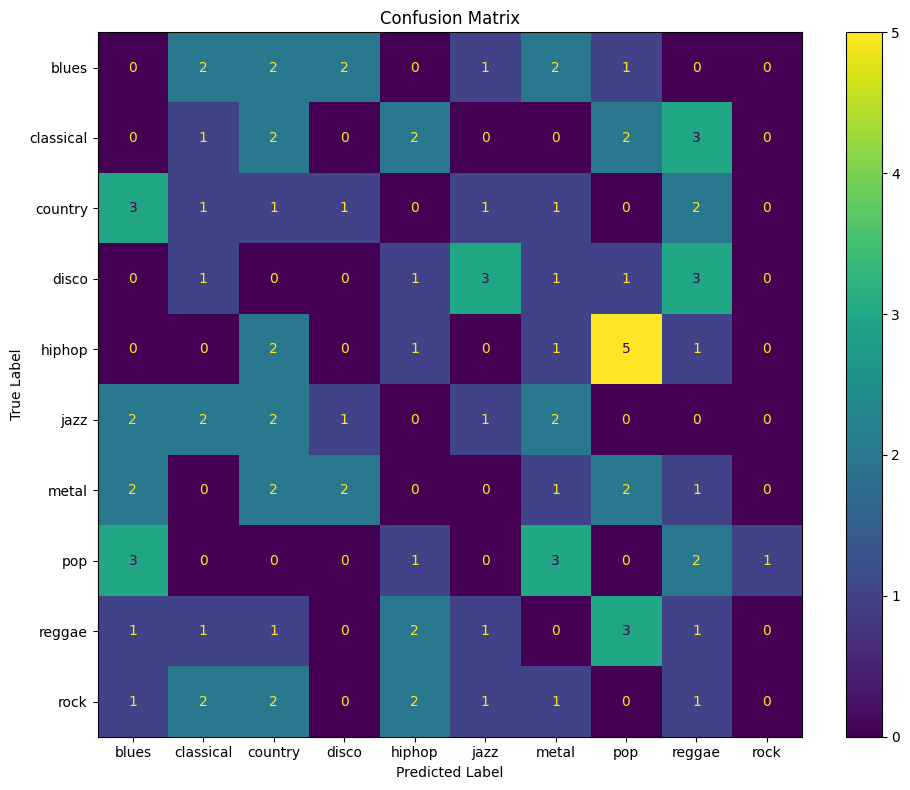

In [ ]:
#Evaluate Performance Clearly

## Evaluate Performance Clearly

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for figure size control

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)
labels = list(val_generator.class_indices.keys())

# Create a figure with a slightly larger size
plt.figure(figsize=(10, 8)) # Adjust size as needed

# Display the confusion matrix on the created figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=plt.gca()) # Plot on the current axes

plt.title('Confusion Matrix') # Optional: Add a title
plt.xlabel('Predicted Label') # Optional: Add x-axis label
plt.ylabel('True Label') # Optional: Add y-axis label
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

In [ ]:
#Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_dir = '/content/drive/MyDrive/My Projects//Music Genre Classification/Data/new_images_split/train'
val_dir = '/content/drive/MyDrive/My Projects//Music Genre Classification/Data/new_images_split/val'
test_dir = '/content/drive/MyDrive/My Projects//Music Genre Classification/Data/new_images_split/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 800 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os

# Define correct base path
base_dir = "/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_split"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[lr_scheduler, early_stop]
)

Found 800 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1235 - loss: 2.3134 - val_accuracy: 0.2100 - val_loss: 2.1997 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1756 - loss: 2.2201 - val_accuracy: 0.2300 - val_loss: 2.0706 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2392 - loss: 2.0922 - val_accuracy: 0.2300 - val_loss: 2.0063 - learning_rate: 0.0010
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2665 - loss: 2.0272 - val_accuracy: 0.3000 - val_loss: 2.0223 - learning_rate: 0.0010
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2595 - loss: 1.9635 - val_accuracy: 0.3100 - val_loss: 1.8682 - learning_rate: 0.0010
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2768 - loss: 1.9317 - val_accuracy: 0.3300 - val_loss: 1.7925 - learning_rate: 0.0010
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3281 - loss: 1.8432 - val_accuracy: 

In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

Found 100 images belonging to 10 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - accuracy: 0.5474 - loss: 1.3095
Test Accuracy: 0.53, Test Loss: 1.33


Found 100 images belonging to 10 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step


<Figure size 1000x800 with 0 Axes>

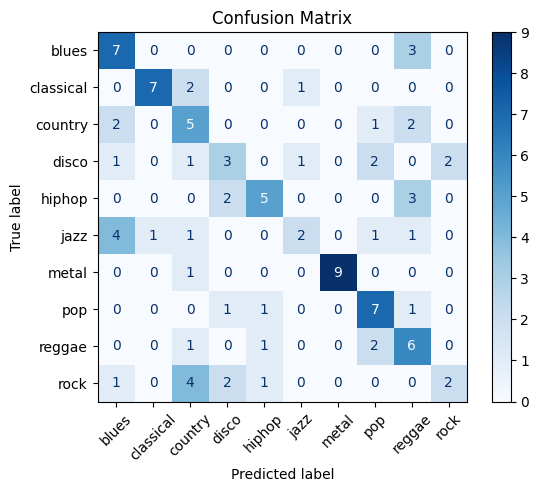

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_split/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label matching
)

# Get predictions
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot it
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Load Pre-trained EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

# Freeze base model layers
base_model.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint('efficientnetb0_best_model.h5', save_best_only=True)

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_38']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.0924 - loss: 2.3878

25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.0929 - loss: 2.3870 - val_accuracy: 0.1000 - val_loss: 2.3473 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.0791 - loss: 2.3543

25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0790 - loss: 2.3541 - val_accuracy: 0.1000 - val_loss: 2.3056 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.1023 - loss: 2.3063

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1018 - loss: 2.3066 - val_accuracy: 0.1000 - val_loss: 2.3038 - learning_rate: 0.0010
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1068 - loss: 2.3156 - val_accuracy: 0.1000 - val_loss: 2.3047 - learning_rate: 0.0010
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.0673 - loss: 2.3171

25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 985ms/step - accuracy: 0.0679 - loss: 2.3169 - val_accuracy: 0.1000 - val_loss: 2.3035 - learning_rate: 0.0010
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.1126 - loss: 2.3042

25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1122 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.1073 - loss: 2.3038

25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1071 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1013 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.0923 - loss: 2.3030
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0926 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1141 - loss: 2.3021 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 5.0000e-04
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.0918 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 5.0000e-04
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.0966 - loss: 2.3038
Epoch 12: Red

In [ ]:
#Model is not learning properly
#Training accuracy is ~10%

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

Found 800 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
input_tensor = Input(shape=(128, 128, 3))

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 🔧 Add custom classification head on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 📉 Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
checkpoint = ModelCheckpoint('efficientnetb0_best.keras', save_best_only=True)

# 🚀 Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_281']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.2567 - loss: 2.0447 - val_accuracy: 0.1000 - val_loss: 2.6843 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.7583 - loss: 0.7977 - val_accuracy: 0.1100 - val_loss: 3.9871 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.8828 - loss: 0.3910 - val_accuracy: 0.1700 - val_loss: 4.7677 - learning_rate: 0.0010
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9205 - loss: 0.2424 - val_accuracy: 0.2500 - val_loss: 6.4294 - learning_rate: 0.0010
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9590 - loss: 0.1172 - val_accuracy: 0.4500 - val_loss: 3.2361 - learning_rate: 5.0000e-04
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9803 - loss: 0.0837 - val_accuracy: 0.5100 - val_loss: 2.4753 - learning_rate: 5.0000e-04
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0

In [ ]:
# Save as HDF5 file
model.save("/content/drive/MyDrive/My Projects/Music Genre Classification/saved_models/efficientnetb0_genre_classifier.h5")

In [6]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/My Projects/Music Genre Classification/saved_models/efficientnetb0_genre_classifier.h5")

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

test_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/My Projects/Music Genre Classification/Data/new_images_split/test',
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'  # or 'categorical' if your labels are one-hot encoded
)

Found 100 files belonging to 10 classes.


In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"🎯 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"🧾 Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6465 - loss: 1.6432
🎯 Test Accuracy: 65.00%
🧾 Test Loss: 1.4778


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


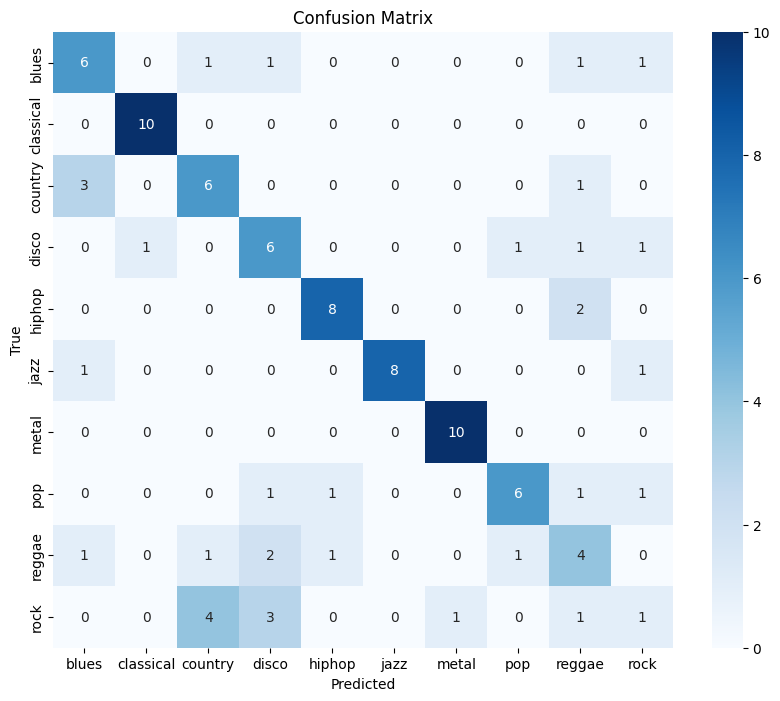


Classification Report:
               precision    recall  f1-score   support

       blues       0.55      0.60      0.57        10
   classical       0.91      1.00      0.95        10
     country       0.50      0.60      0.55        10
       disco       0.46      0.60      0.52        10
      hiphop       0.80      0.80      0.80        10
        jazz       1.00      0.80      0.89        10
       metal       0.91      1.00      0.95        10
         pop       0.75      0.60      0.67        10
      reggae       0.36      0.40      0.38        10
        rock       0.20      0.10      0.13        10

    accuracy                           0.65       100
   macro avg       0.64      0.65      0.64       100
weighted avg       0.64      0.65      0.64       100



In [15]:
#Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get class labels
class_names = test_dataset.class_names

# Initialize true and predicted labels
y_true = []
y_pred = []

# Get predictions
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())  # Already scalar labels
    y_pred.extend(np.argmax(preds, axis=1))  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))